<a href="https://colab.research.google.com/github/bhramizadafiya/ADS500B--Final-Project/blob/main/BankMarketing_Data_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting to Know about the Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Marketing_Data.csv to Marketing_Data.csv


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df=pd.read_csv('Marketing_Data.csv')



In [ ]:

# Inspect the data structure
print("Dataset Information:\n")
print(df.info())
print("\nFirst 5 rows of the dataset:\n")
df.head()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB
None

First 5 rows of the dataset:



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n")
print(missing_values)


Missing values in each column:

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64


In [ ]:
# Basic descriptive statistics
print("\nDescriptive Statistics:\n")
print(df.describe(include='all'))


Descriptive Statistics:

                 age          job  marital  education default        balance  \
count   43872.000000        45211    45211      45211   43905   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   43113            NaN   
mean       40.924781          NaN      NaN        NaN     NaN    1362.272058   
std        10.610835          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housin

# Handling Missing Values

1. **Column**: `age`

  **Analysis**: `Age` is a numerical column. Missing values can be imputed based on the distribution of age or its relationship with other variables like job, marital, or education.

  **Solution**:
If the distribution of age is unimodal and symmetrical, use the median to fill missing values.
If age has distinct patterns based on job, marital status, or education, use group-based imputation.


2. **Column**: `default`

  **Analysis**: This is a binary categorical column (yes or no). Since missing values may be indicative of a lack of information, it’s safe to fill them with the mode (no).

  **Solution:**
Replace missing values with the mode (no).

3. **Column**: `contact`

  **Analysis**: This is a categorical column (unknown, telephone, cellular). Missing values can be filled with unknown, as this category already exists in the data and likely represents missing information.

  **Solution**:
  Replace missing values with unknown.


In [ ]:
# Handle missing values in `age`
# Impute with the median
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)

# Alternatively, group-based imputation for `age` (uncomment if desired)
# data['age'] = data.groupby(['job', 'marital', 'education'])['age'].transform(
#     lambda x: x.fillna(x.median())
# )

# Handle missing values in `default` (fill with mode)
default_mode = df['default'].mode()[0]
df['default'].fillna(default_mode, inplace=True)

# Handle missing values in `contact` (fill with 'unknown')
df['contact'].fillna('unknown', inplace=True)

# Verify missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n")
print(missing_values_after)



Missing values after handling:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<ipython-input-14-5c4db3c98a59>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_median, inplace=True)
<ipython-input-14-5c4db3c98a59>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

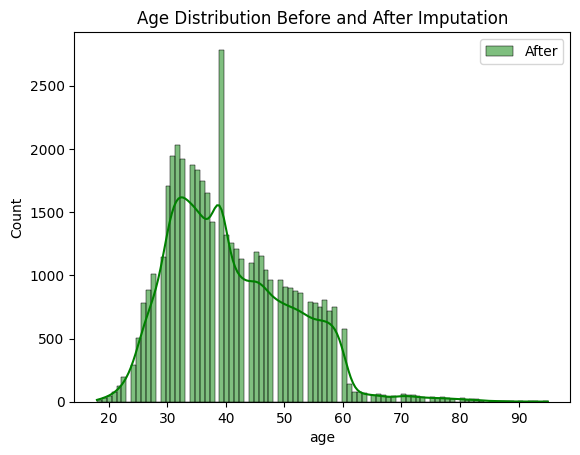

In [ ]:
#Optional: Analyze Changes
#Visualize the imputation effect for age to verify it aligns with the existing distribution:

import matplotlib.pyplot as plt
import seaborn as sns

# Before imputation (if you saved the original dataset)
# sns.histplot(original_data['age'], color='blue', label='Before', kde=True)

# After imputation
sns.histplot(df['age'], color='green', label='After', kde=True)

plt.title("Age Distribution Before and After Imputation")
plt.legend()
plt.show()


# Identify categorical, ordinal, and numerical variables within the data

## 1. Categorical Variables

These variables represent distinct categories or labels that do not have an inherent order.

**a. Job**

**Description:** Type of job of the client.

Categories: `admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services.`

**Visualization**:


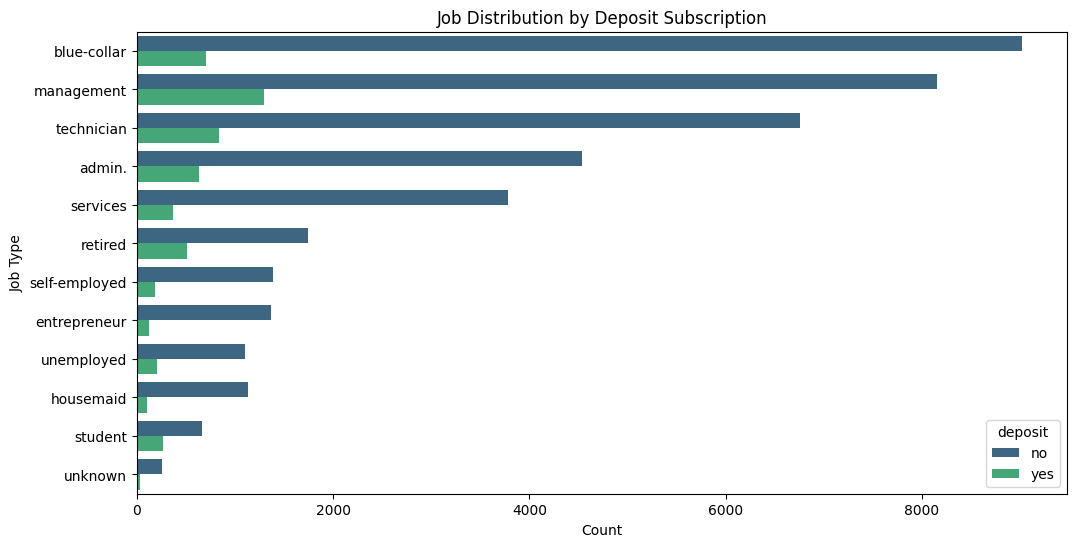

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='job', hue='deposit', order=df['job'].value_counts().index, palette='viridis')
plt.title("Job Distribution by Deposit Subscription")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()


**b. Marital**

**Description:** Marital status of the client.

**Categories:** `married, single, divorced.`

**Visualization**:

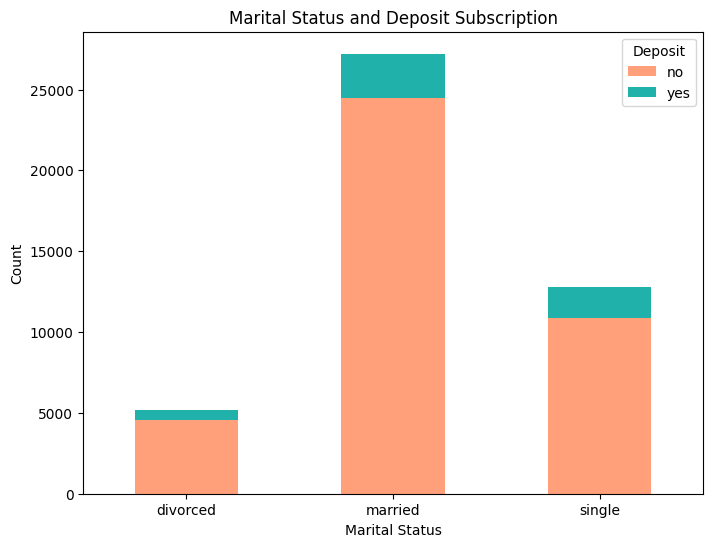

In [ ]:
marital_data = df.groupby(['marital', 'deposit']).size().unstack()
marital_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FFA07A', '#20B2AA'])
plt.title("Marital Status and Deposit Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Deposit")
plt.show()


**c. Default**

**Description:** Whether the client has credit in default.

**Categories:**` yes, no.`

**Visualization:**

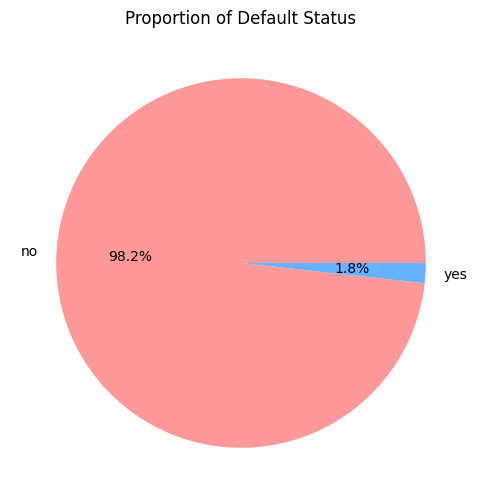

In [ ]:
default_counts = df['default'].value_counts()
default_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['#FF9999', '#66B2FF'], labels=default_counts.index)
plt.title("Proportion of Default Status")
plt.ylabel("")
plt.show()



**d. Housing**

**Description:** Whether the client has a housing loan.

**Categories:** `yes, no.`

Visualization:

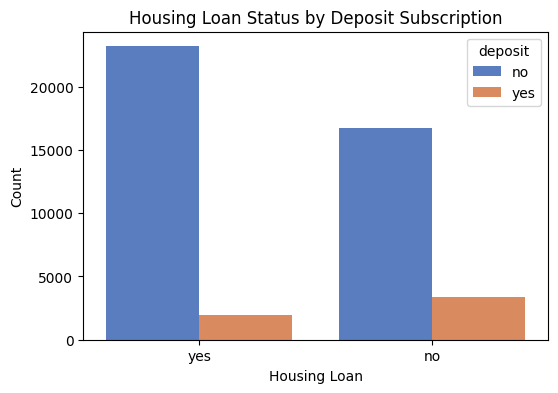

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='housing', hue='deposit', palette='muted')
plt.title("Housing Loan Status by Deposit Subscription")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.show()


**e. Loan**

**Description:** Whether the client has a personal loan.

**Categories:** `yes, no.`

**Visualization:**

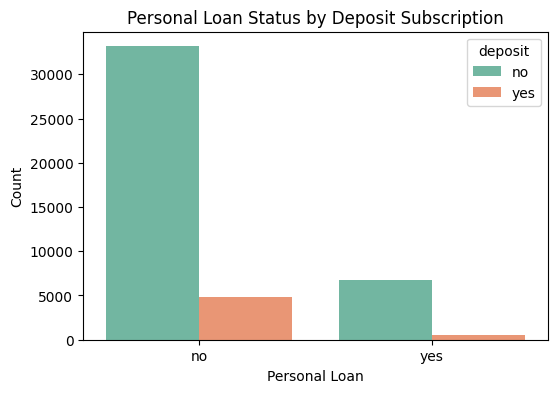

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan', hue='deposit', palette='Set2')
plt.title("Personal Loan Status by Deposit Subscription")
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.show()


**f. Contact**

**Description**: Contact communication type.

**Categories:** `unknown, telephone, cellular.`

**Visualization:**

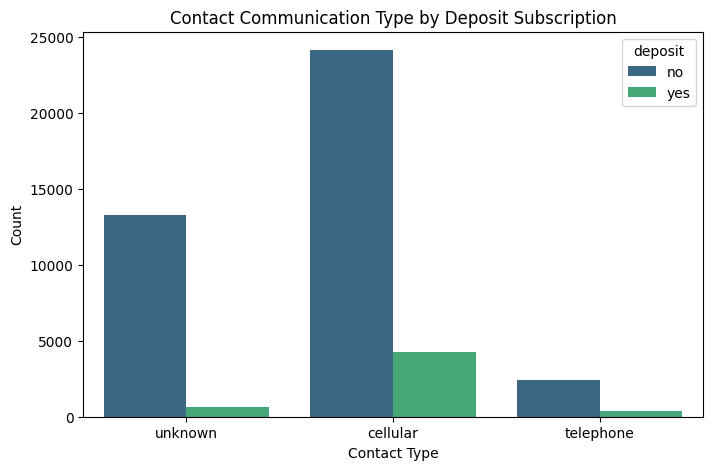

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='contact', hue='deposit', palette='viridis')
plt.title("Contact Communication Type by Deposit Subscription")
plt.xlabel("Contact Type")
plt.ylabel("Count")
plt.show()


**g. Poutcome**

**Description:** Outcome of the previous marketing campaign.

**Categories:** `unknown, other, failure, success.`

**Visualization:**

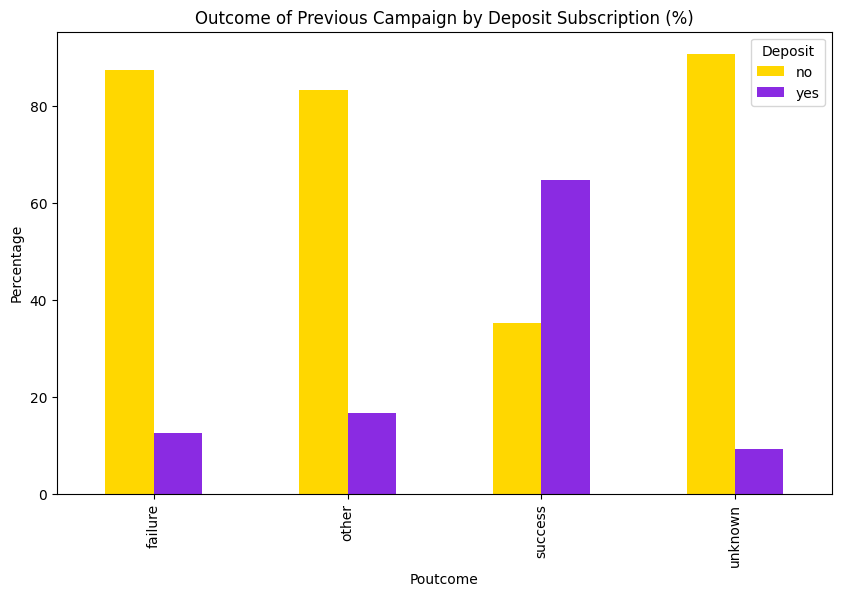

In [ ]:
poutcome_data = df.groupby('poutcome')['deposit'].value_counts(normalize=True).unstack() * 100
poutcome_data.plot(kind='bar', figsize=(10, 6), color=['#FFD700', '#8A2BE2'])
plt.title("Outcome of Previous Campaign by Deposit Subscription (%)")
plt.xlabel("Poutcome")
plt.ylabel("Percentage")
plt.legend(title="Deposit")
plt.show()


## 2. Ordinal Variables
These variables have a natural order among their categories.

**a. Education**

**Description:** Education level of the client.

**Categories (ordered):** `primary, secondary, tertiary, unknown.`

**Visualization:**

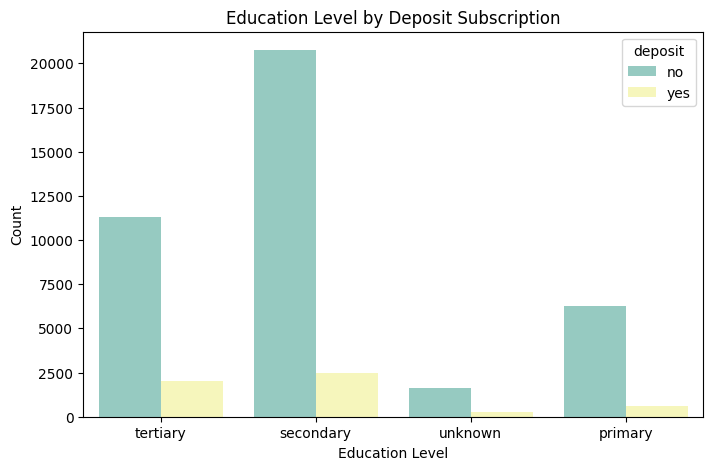

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='deposit', palette='Set3')
plt.title("Education Level by Deposit Subscription")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


**b. Month**

**Description:** The month of the last contact.

**Categories (ordered)**: `jan, feb, mar, ..., nov, dec.`

**Visualization:**

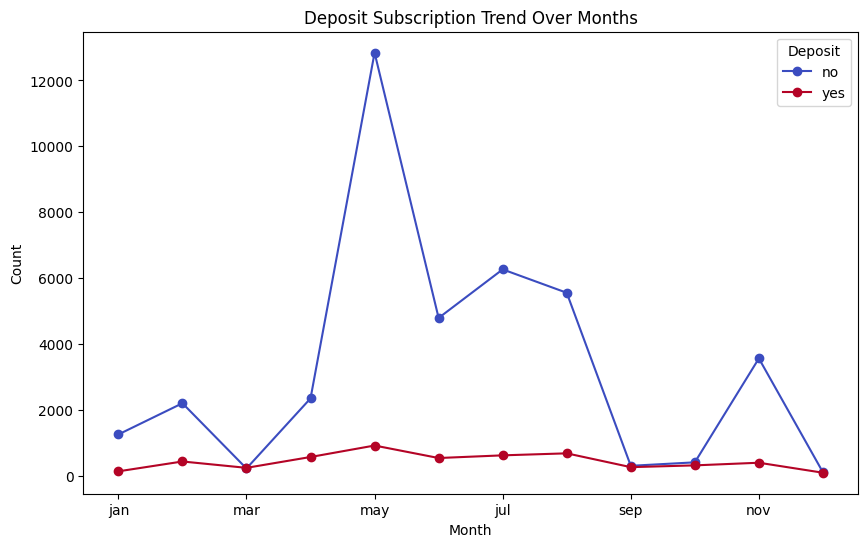

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_data = df.groupby(['month', 'deposit']).size().unstack().reindex(month_order)
monthly_data.plot(kind='line', figsize=(10, 6), marker='o', colormap='coolwarm')
plt.title("Deposit Subscription Trend Over Months")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.show()



## 3. Numerical Variables

These variables are quantitative and continuous.

**a. Age**

**Description:** Age of the client.

**Visualization:**

<ipython-input-29-c654d06178c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y='age', palette='Set2')


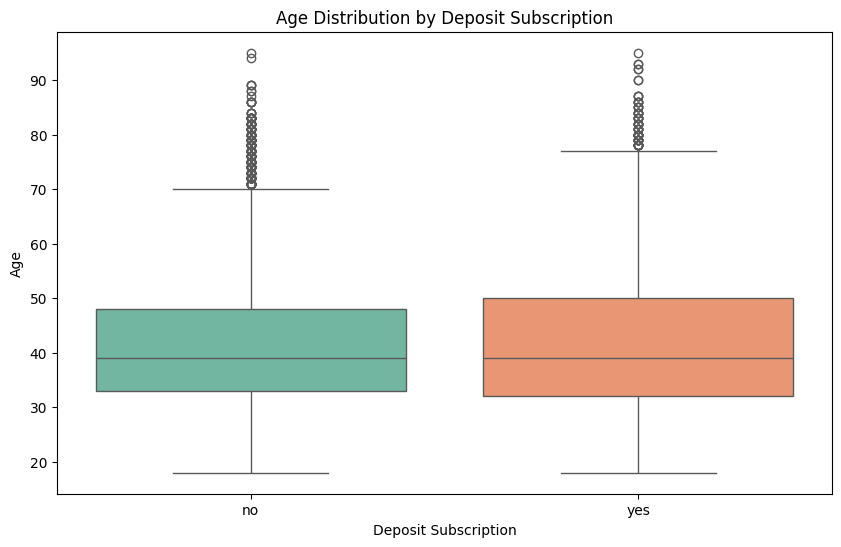

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='deposit', y='age', palette='Set2')
plt.title("Age Distribution by Deposit Subscription")
plt.xlabel("Deposit Subscription")
plt.ylabel("Age")
plt.show()


**b. Balance**

**Description:** Average yearly balance in euros.

**Visualization:**

<ipython-input-33-8538dde39e64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y='balance', palette='coolwarm')


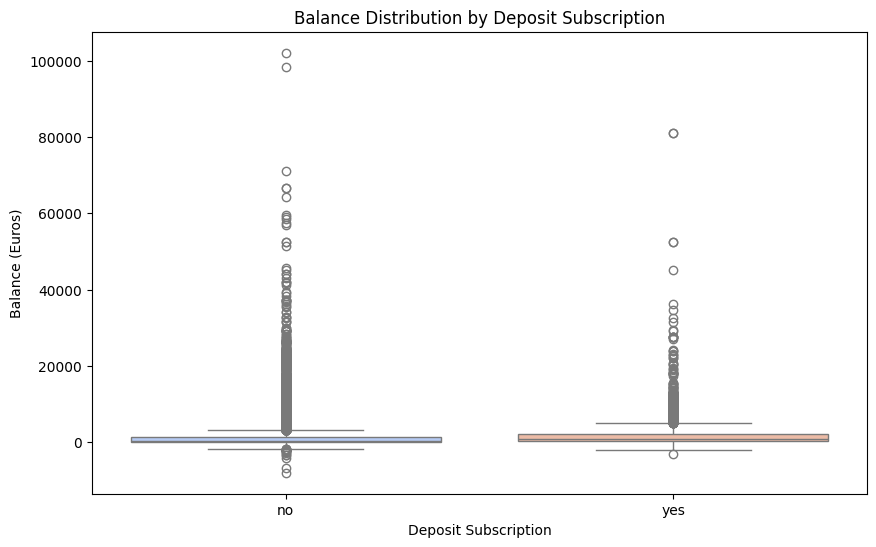

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='deposit', y='balance', palette='coolwarm')
plt.title("Balance Distribution by Deposit Subscription")
plt.xlabel("Deposit Subscription")
plt.ylabel("Balance (Euros)")
plt.show()



**c. Duration**

**Description:** Duration of the last contact in seconds.

**Visualization:**

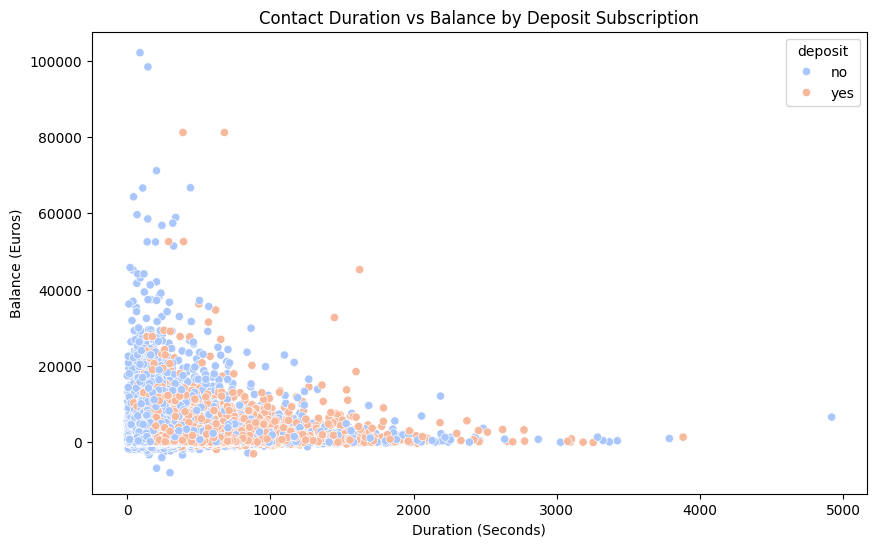

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='balance', hue='deposit', palette='coolwarm')
plt.title("Contact Duration vs Balance by Deposit Subscription")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Balance (Euros)")
plt.show()



**d. Campaign**

**Description:** Number of contacts performed during this campaign for the client.

**Visualization**

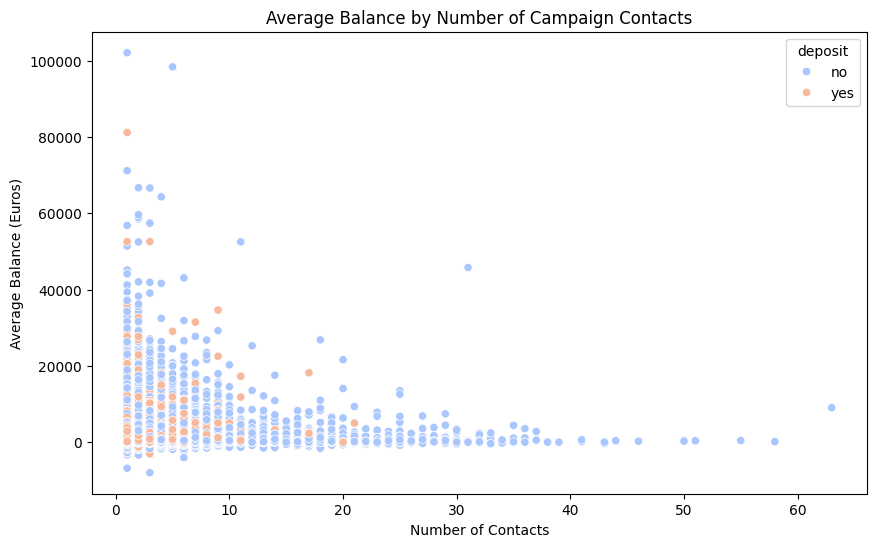

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='campaign', y='balance', hue='deposit', palette='coolwarm')
plt.title("Average Balance by Number of Campaign Contacts")
plt.xlabel("Number of Contacts")
plt.ylabel("Average Balance (Euros)")
plt.show()

**e. Pdays**

**Description:** Number of days since the client was last contacted.

**Visualization:**

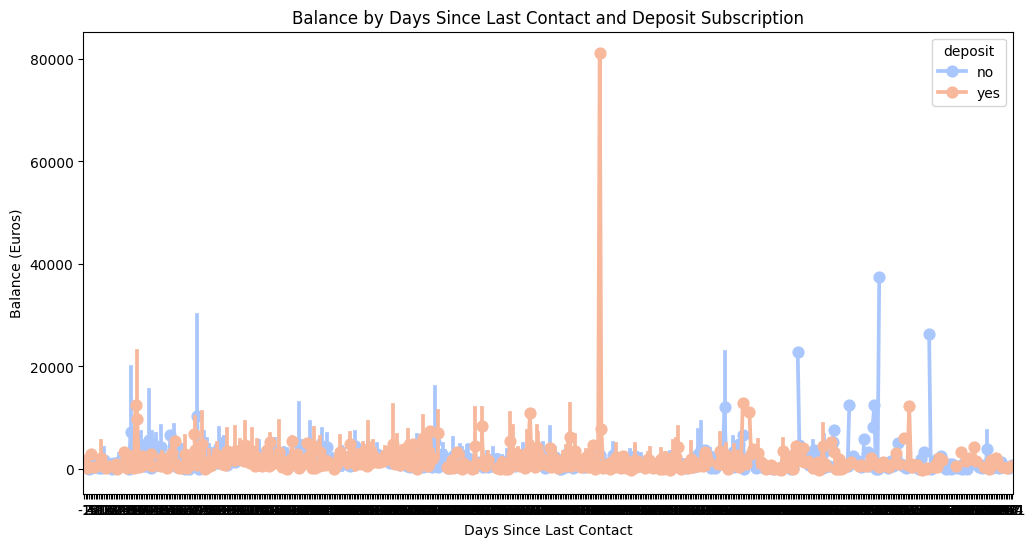

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='pdays', y='balance', hue='deposit', palette='coolwarm')
plt.title("Balance by Days Since Last Contact and Deposit Subscription")
plt.xlabel("Days Since Last Contact")
plt.ylabel("Balance (Euros)")
plt.show()


**f. Previous**

**Description:** Number of contacts performed before this campaign for the client.

**Visualization**

In [ ]:
correlation = df[['previous', 'campaign', 'pdays', 'duration', 'balance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap Among Numerical Variables")
plt.show()


# Provide measures of centrality and distribution with visualizations

To analyze the measures of centrality (mean, median, mode) and distribution (range, variance, standard deviation, skewness, kurtosis) of the numerical variables, we combine statistical summaries with visualizations.

Below is the detailed analysis:

**Numerical Variables**

The following numerical variables are analyzed:

```
age

balance

duration

campaign

pdays

previous
```


**Statistical Summary Table**

We calculate the following statistics for each numerical variable:



```
Mean

Median

Mode

Standard Deviation (SD)

Variance

Skewness

Kurtosis
```



In [ ]:
from scipy.stats import kurtosis, skew

# Create a summary table
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
stats = pd.DataFrame(columns=['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Skewness', 'Kurtosis'])

for col in numerical_columns:
    stats.loc[col] = [
        df[col].mean(),
        df[col].median(),
        df[col].mode()[0],
        df[col].std(),
        df[col].var(),
        skew(df[col]),
        kurtosis(df[col])
    ]

print(stats)


                 Mean  Median   Mode      Std Dev      Variance   Skewness  \
age         40.867776    39.0   39.0    10.457614  1.093617e+02   0.710746   
balance   1362.272058   448.0    0.0  3044.765829  9.270599e+06   8.360031   
duration   258.163080   180.0  124.0   257.527812  6.632057e+04   3.144214   
campaign     2.763841     2.0    1.0     3.098021  9.597733e+00   4.898488   
pdays       40.197828    -1.0   -1.0   100.128746  1.002577e+04   2.615629   
previous     0.580323     0.0    0.0     2.303441  5.305841e+00  41.845066   

             Kurtosis  
age          0.427584  
balance    140.735848  
duration    18.151775  
campaign    39.245178  
pdays        6.934296  
previous  4506.362118  


## Visualizations for Centrality and Distribution

**1. Age**

**Measure of Centrality:** Age distribution shows where the majority of clients lie in terms of age.

**Visualization:**



*   Box Plot for distribution
*   Histogram with KDE for density






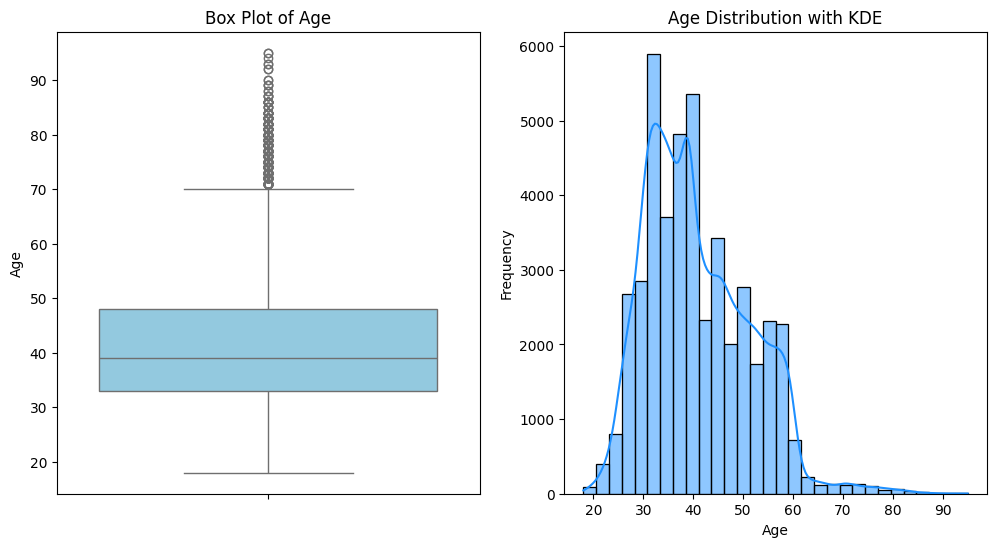

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='age', color='skyblue')
plt.title("Box Plot of Age")
plt.ylabel("Age")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', kde=True, color='dodgerblue', bins=30)
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**2. Balance**

**Measure of Centrality:** The balance has a wide range and high skewness due to outliers.

**Visualization:**
*  Violin Plot for distribution with density


- Log-Scaled Histogram to handle skewness

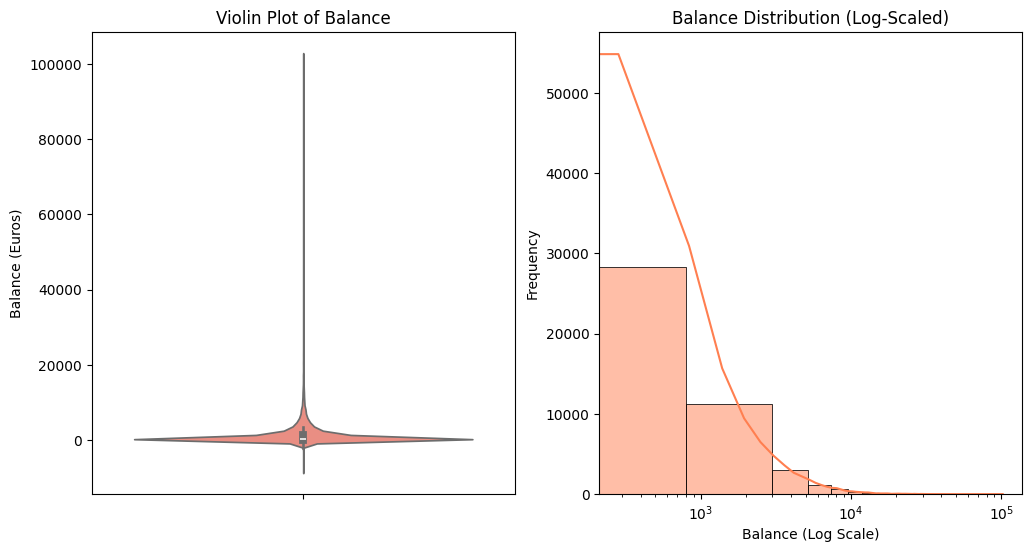

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='balance', color='salmon')
plt.title("Violin Plot of Balance")
plt.ylabel("Balance (Euros)")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='balance', kde=True, color='coral', bins=50)
plt.xscale('log')  # Log-scale to manage outliers
plt.title("Balance Distribution (Log-Scaled)")
plt.xlabel("Balance (Log Scale)")
plt.ylabel("Frequency")
plt.show()


**3. Duration**

**Measure of Centrality:** Call duration tends to have a long tail, meaning some clients had significantly longer calls.

**Visualization:**
* Box Plot for outliers
* Histogram for general distribution

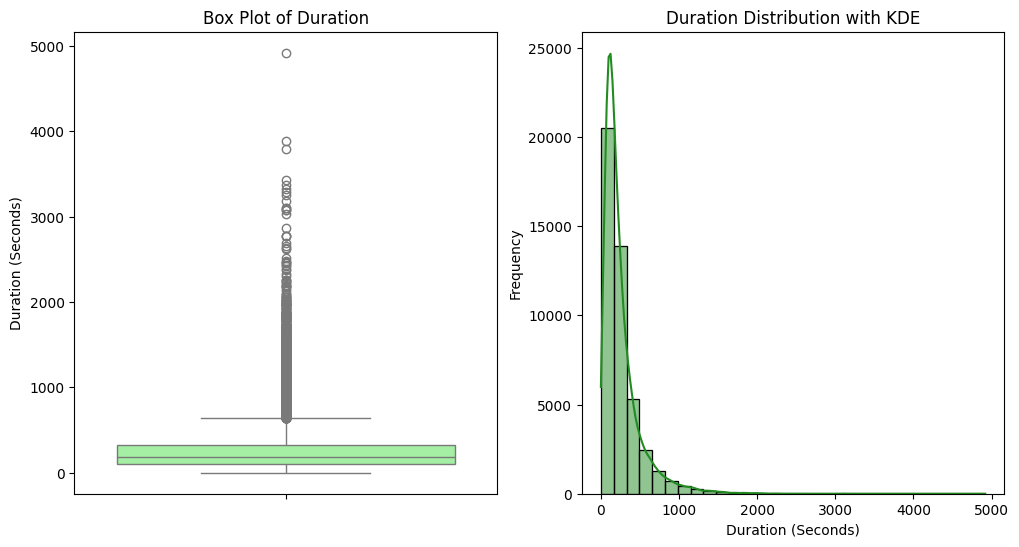

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='duration', color='palegreen')
plt.title("Box Plot of Duration")
plt.ylabel("Duration (Seconds)")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='duration', kde=True, color='forestgreen', bins=30)
plt.title("Duration Distribution with KDE")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Frequency")
plt.show()


**4. Campaign**

**Measure of Centrality**: Number of contacts made during the campaign. Most clients had only a few contacts.

**Visualization:**

- Bar Plot to see distribution
- Box Plot for outliers

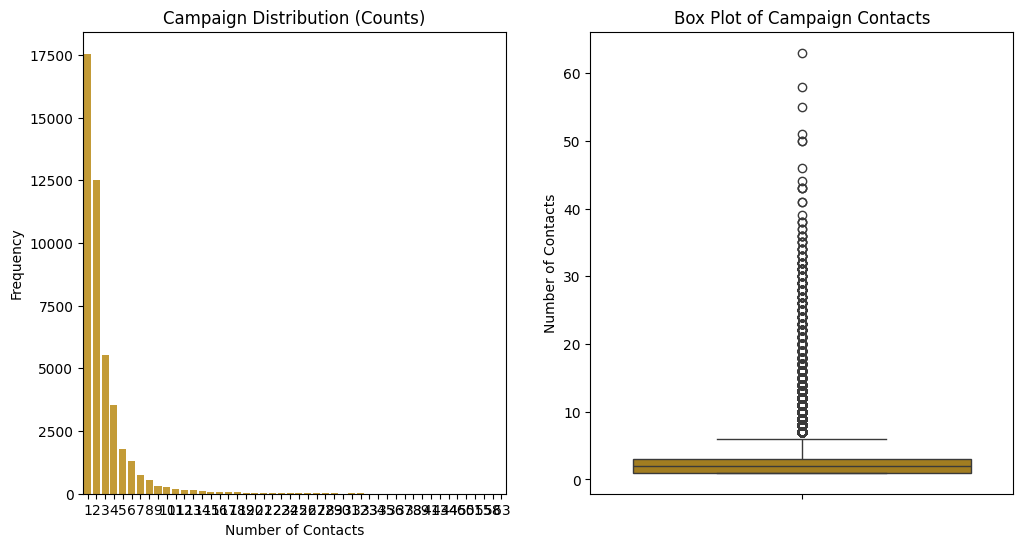

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='campaign', color='goldenrod')
plt.title("Campaign Distribution (Counts)")
plt.xlabel("Number of Contacts")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='campaign', color='darkgoldenrod')
plt.title("Box Plot of Campaign Contacts")
plt.ylabel("Number of Contacts")
plt.show()


**5. Pdays**

**Measure of Centrality:** Pdays measures the number of days since the client was last contacted. Many entries have the value -1 indicating no prior contact.

**Visualization:**

- Point Plot for distribution with average
- Histogram with KDE

pdays           -1           1           2     3       4           5    \
deposit                                                                  
no       1280.229014  401.444444  684.371429   0.0    94.0  912.636364   
yes      1701.310579  844.500000   81.500000   NaN  2974.0         NaN   

pdays           6           7      8           9    ...     805    808  \
deposit                                             ...                  
no       386.555556  296.857143  999.8  118.000000  ...     NaN  137.0   
yes      398.000000         NaN    NaN  701.333333  ...  1547.0    NaN   

pdays       826    828    831    838    842    850    854    871  
deposit                                                           
no       1387.0    NaN  384.0  408.0    NaN  151.0    NaN  780.0  
yes         NaN  320.0    NaN    NaN  243.0    NaN  488.0    NaN  

[2 rows x 559 columns]


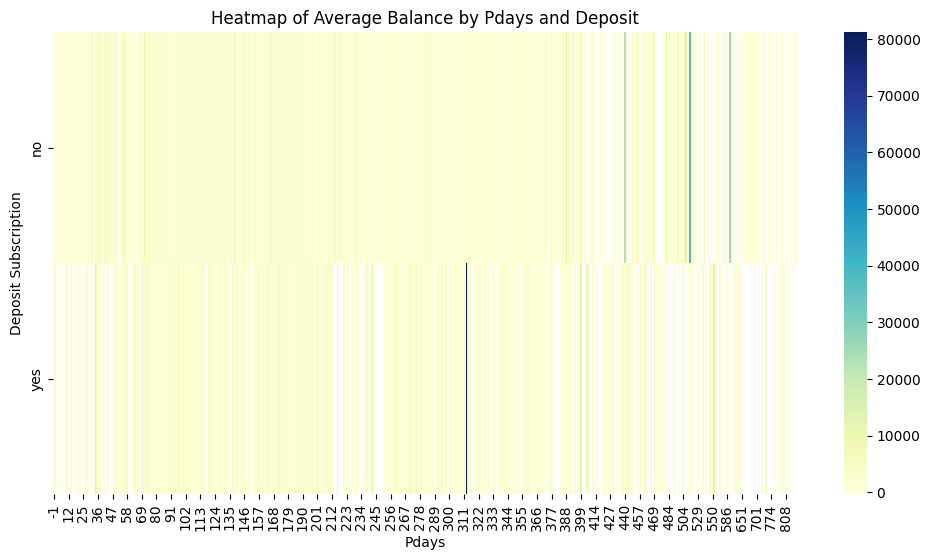

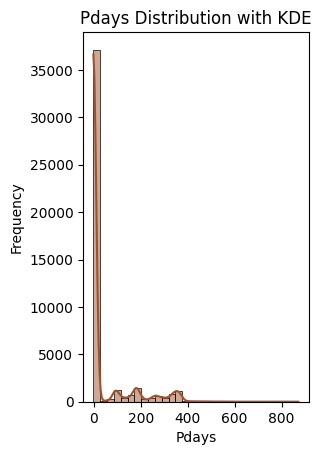

In [ ]:
# Creating a pivot table for heatmap
heatmap_data = df.pivot_table(values='balance', index='deposit', columns='pdays', aggfunc='mean')
print(df.pivot_table(values='balance', index='deposit', columns='pdays', aggfunc='mean'))
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title("Heatmap of Average Balance by Pdays and Deposit")
plt.xlabel("Pdays")
plt.ylabel("Deposit Subscription")
plt.show()



plt.subplot(1, 2, 2)
sns.histplot(data=df, x='pdays', kde=True, color='sienna', bins=30)
plt.title("Pdays Distribution with KDE")
plt.xlabel("Pdays")
plt.ylabel("Frequency")
plt.show()


**6. Previous**

**Measure of Centrality**: The number of contacts performed in previous campaigns. This is highly skewed as most clients were contacted few times.

**Visualization:**
- Box Plot for distribution
- Bar Plot for specific values

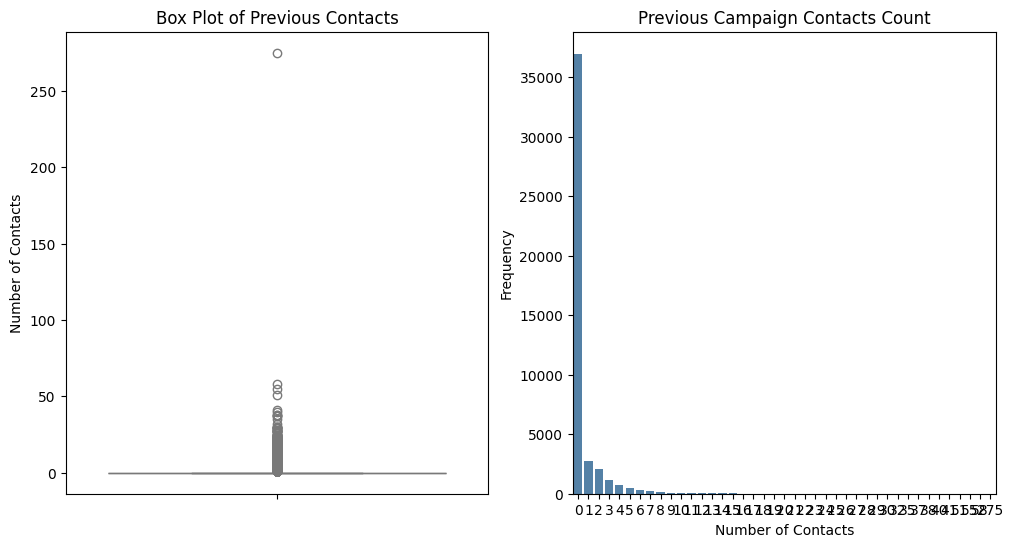

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='previous', color='lightblue')
plt.title("Box Plot of Previous Contacts")
plt.ylabel("Number of Contacts")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='previous', color='steelblue')
plt.title("Previous Campaign Contacts Count")
plt.xlabel("Number of Contacts")
plt.ylabel("Frequency")
plt.show()


# Diagnose for correlations between variables and determine independent and dependent variables



To diagnose correlations between variables, we need to assess how the numerical variables relate to each other and identify the strength and direction of these relationships.

Additionally, it's essential to distinguish between independent and dependent variables in the dataset, especially for building a machine learning model.

**Step 1: Calculate Correlation Matrix**

The correlation matrix helps us identify linear relationships between numerical variables. We will use Pearson's correlation coefficient, which ranges from -1 (strong negative correlation) to +1 (strong positive correlation). A correlation close to 0 suggests a weak or no linear relationship.

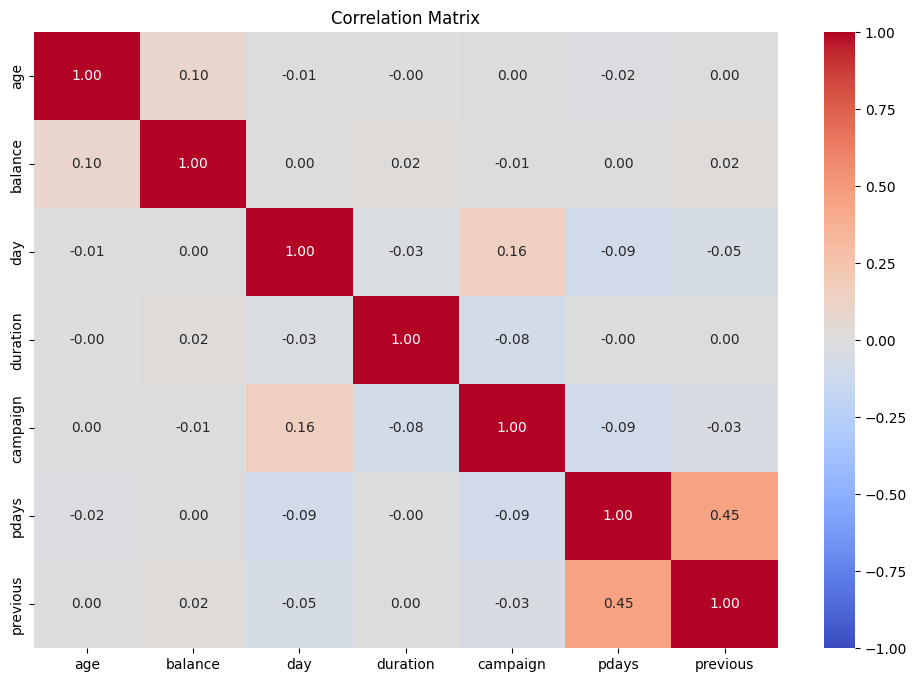

In [ ]:


# Calculate the correlation matrix for numerical variables only
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


**Step 2: Identify Strong Correlations**

Examine the correlation values to identify which variables are strongly correlated (values close to +1 or -1). For example:

- `duration:` This might show a strong positive correlation with campaign  because the longer the call duration, the more likely it is that multiple contacts occurred in the campaign.

- `balance:` This may not show a strong correlation with other variables unless it’s related to financial features or customer behavior.



---



**Step 3: Determine Independent and Dependent Variables**

**Dependent Variable:** In the context of the bank marketing dataset, the dependent variable is typically the one you are trying to predict or classify. In this case, it is the deposit column, which indicates whether the client subscribed to the bank term deposit (yes or no).

**Independent Variables:** These are the other variables that help predict the dependent variable. These can include:

Numerical Variables: `age, balance, duration, campaign, pdays, previous`

Categorical Variables: `job, marital, education, default, housing, loan, contact, month, poutcome`

For the purpose of modeling, you'll need to encode categorical variables and standardize/normalize numerical variables.



---



**Step 4: Visualize Relationships Between Independent Variables and Dependent Variable**

To better understand the relationships between independent variables and the dependent variable (deposit), we can create various visualizations.

1. **Numerical Variables vs. Deposit (Categorical)**

- Box Plot: For visualizing the spread of numerical variables based on whether the client subscribed (deposit).

<ipython-input-56-7f6bff6817ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y='balance', palette='Set2')


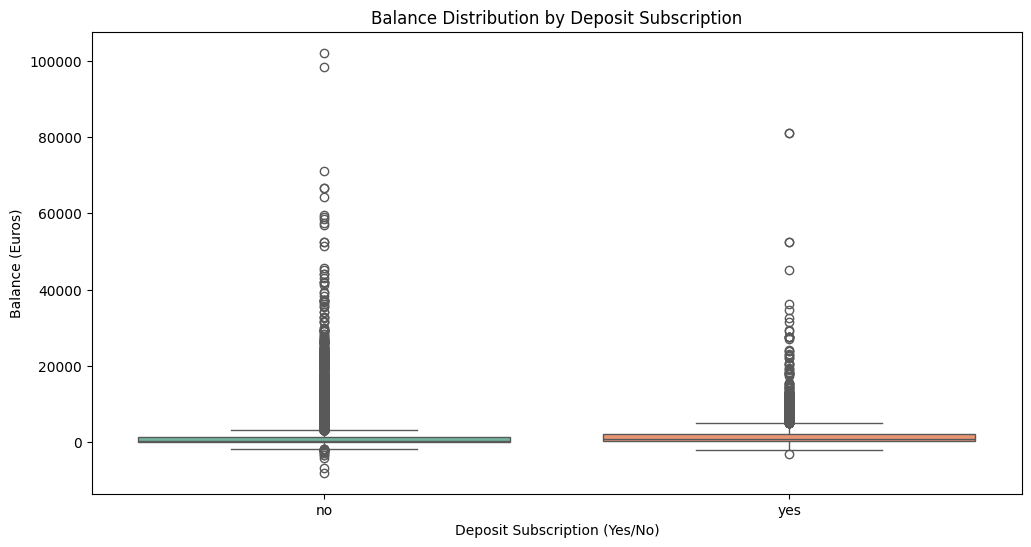

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='deposit', y='balance', palette='Set2')
plt.title("Balance Distribution by Deposit Subscription")
plt.xlabel("Deposit Subscription (Yes/No)")
plt.ylabel("Balance (Euros)")
plt.show()


- Count Plot: For categorical features like job, education, and marital with respect to deposit.

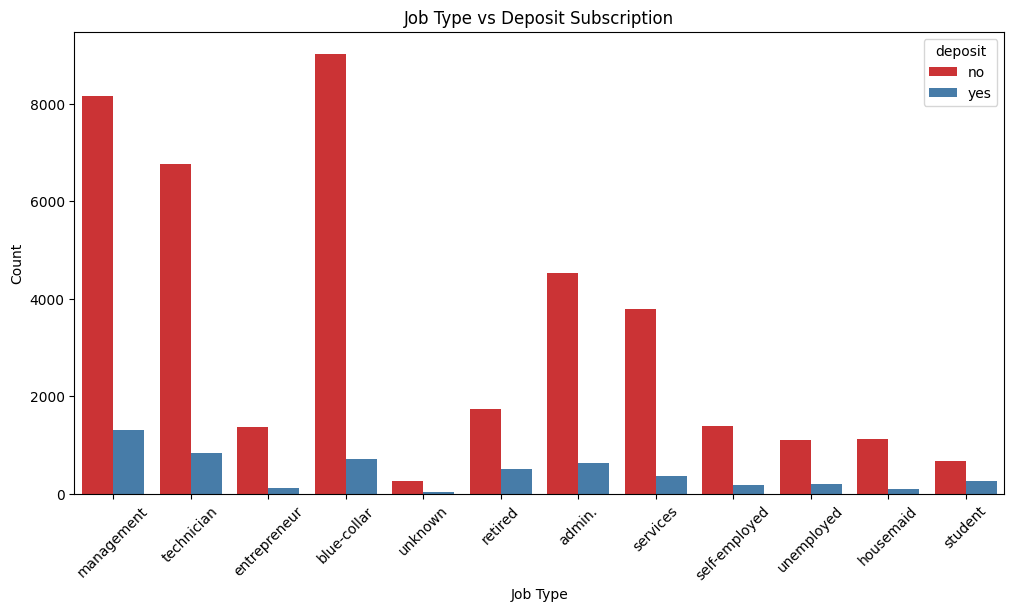

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='deposit', palette='Set1')
plt.title("Job Type vs Deposit Subscription")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**2. Visualize Correlations Between Features**

For numerical variables, you could also use pair plots or scatter plots to show relationships between pairs of variables.

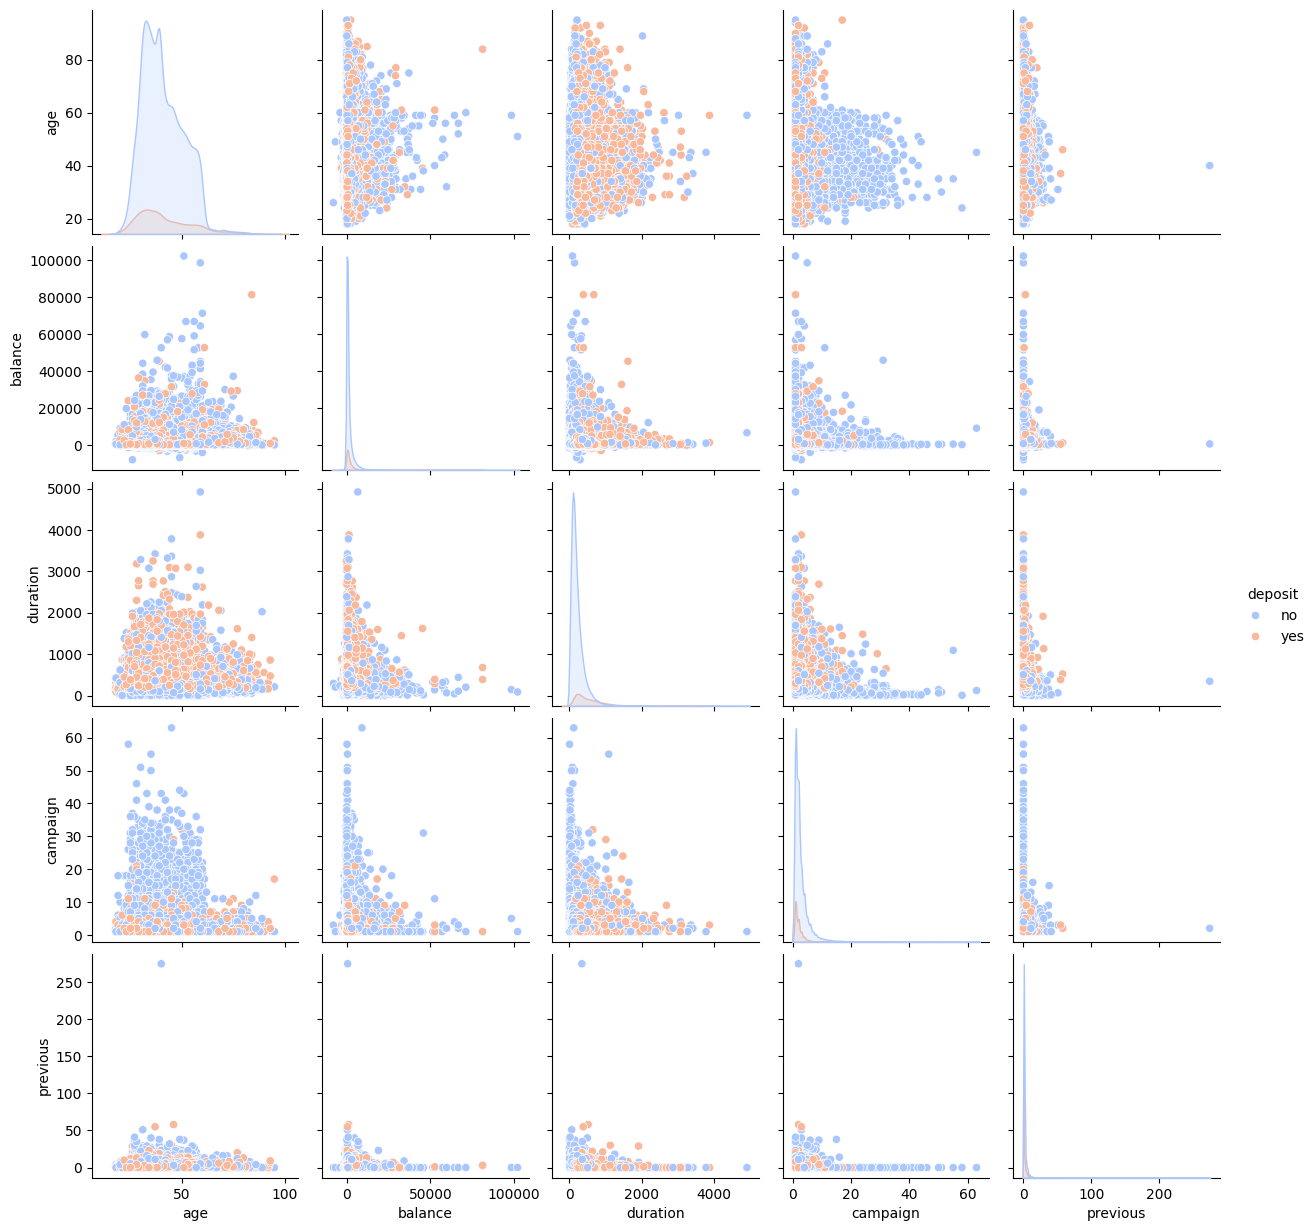

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'previous', 'deposit']], hue='deposit', palette='coolwarm')
plt.show()


**Step 5: Identifying Redundant Features (Multicollinearity)**

Look for highly correlated independent variables (e.g., correlation coefficient greater than 0.8 or less than -0.8). These variables may introduce multicollinearity in your model, which could reduce its performance. For example:

- If duration and campaign are highly correlated, you may want to keep only one of them for modeling.
- Similarly, if pdays and previous are correlated, we might consider feature selection techniques to reduce dimensionality.

**Step 6: Check for Multicollinearity Using VIF (Variance Inflation Factor)**

We can compute the VIF to detect multicollinearity among independent variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only the numerical features
X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF data
print(vif_data)


   Variable       VIF
0       age  3.013386
1   balance  1.212450
2  duration  1.889715
3  campaign  1.723392
4     pdays  1.454856
5  previous  1.341483


A VIF value above 5 or 10 suggests significant multicollinearity, meaning that the variable is highly correlated with others in the model.

**Here, we dont have a good score of VIF, which means we dont have high collinearity with the others in the model**



---

In the context of a **predictive modeling problem**, the `dependent variable` (also known as the target variable) is the variable we are trying to predict or classify based on the available features.

The `independent variables` (also known as predictor variables or features) are the variables that influence or predict the dependent variable.

Here’s why deposit is considered the dependent variable and all other variables are independent variables in this dataset:

**Why is deposit the Dependent Variable?**

1. Objective of the Problem:

- The dataset describes a marketing campaign where the goal is to predict whether a client will subscribe to a bank term deposit (represented by the deposit column).
- The **deposit** column indicates whether or not the client subscribed to the term deposit (with possible values yes or no).
- This is the outcome or target we want to predict based on other client information (age, job, marital status, etc.).

2. Type of Variable:

- deposit is a binary categorical variable with two possible outcomes: yes (subscribed to the deposit) and no (did not subscribe).
- In a classification problem, this variable is typically the dependent or target variable, as the goal is to classify clients into one of these two categories based on other data points.

3. Role of **deposit**:

  The goal is to predict whether a new client will subscribe to the term deposit (yes or no), so deposit is what we are trying to understand and forecast.

**Why are the Other Variables Independent Variables?**

1. **Predictive Role:**

  The remaining columns such as age, job, marital, balance, housing, loan, duration, previous, and others are the independent variables. These variables predict or influence the dependent variable (deposit).

  For example, a person’s age, job, or balance might influence whether they are likely to subscribe to a term deposit.

2. **Influence on deposit:**

  Each of these independent variables provides useful information about the client, which can help the model learn patterns and predict the likelihood of subscription to the deposit.

  For instance, someone with a higher balance or who holds a housing loan might have a higher or lower chance of subscribing to a deposit.
The Role of Independent Variables:

The independent variables serve as the input to a predictive model (e.g., logistic regression, decision tree), which uses them to make predictions about the deposit variable.
These variables drive or explain the outcome of the dependent variable (deposit).

In [ ]:
# Dependent variable (target)
dependent_variable = 'deposit'


We explicitly define deposit as the dependent variable because it is what we are trying to predict.

In [ ]:
# Independent variables (features)
# Exclude the dependent variable from the list of features
independent_variables = df.drop(columns=[dependent_variable]).columns.tolist()


We drop the deposit column from the dataset (df.drop(columns=[dependent_variable])) to create the list of independent variables.
The remaining columns are independent variables because they are the features we will use to predict deposit

# Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

To perform exploratory data analysis (EDA) in combination with visualization techniques, we can systematically explore the data, discover relationships, and identify features that might be of interest for further modeling. We will use visualizations to uncover patterns, trends, and anomalies, as well as to better understand the distribution of each feature.

Let's go step by step and explore the dataset through the following analysis techniques:

**1. General Data Overview**

  a.  Data Shape and Types

  - Purpose: Helps us understand the number of rows and columns, as well as the types of data (numerical, categorical) and missing values.


In [ ]:
# Display the first few rows to understand the structure of the dataset
df.head()

# Data shape
print(f"Dataset Shape: {df.shape}")

# Data types and null values
df.info()


Dataset Shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


**2. Univariate Analysis (Single Variable) **


b. Categorical Features: Distribution of Categories

We'll begin by analyzing the categorical features such as `job, marital, education, default, housing, loan, contact, month, poutcome, and deposit.`

-Purpose: To check the distribution of categorical variables, observe imbalances (e.g., if most clients have "admin" job, or if deposit is imbalanced with more no than yes).



<ipython-input-63-b73d0a12be22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-63-b73d0a12be22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-63-b73d0a12be22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-63-b73d0a12be22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

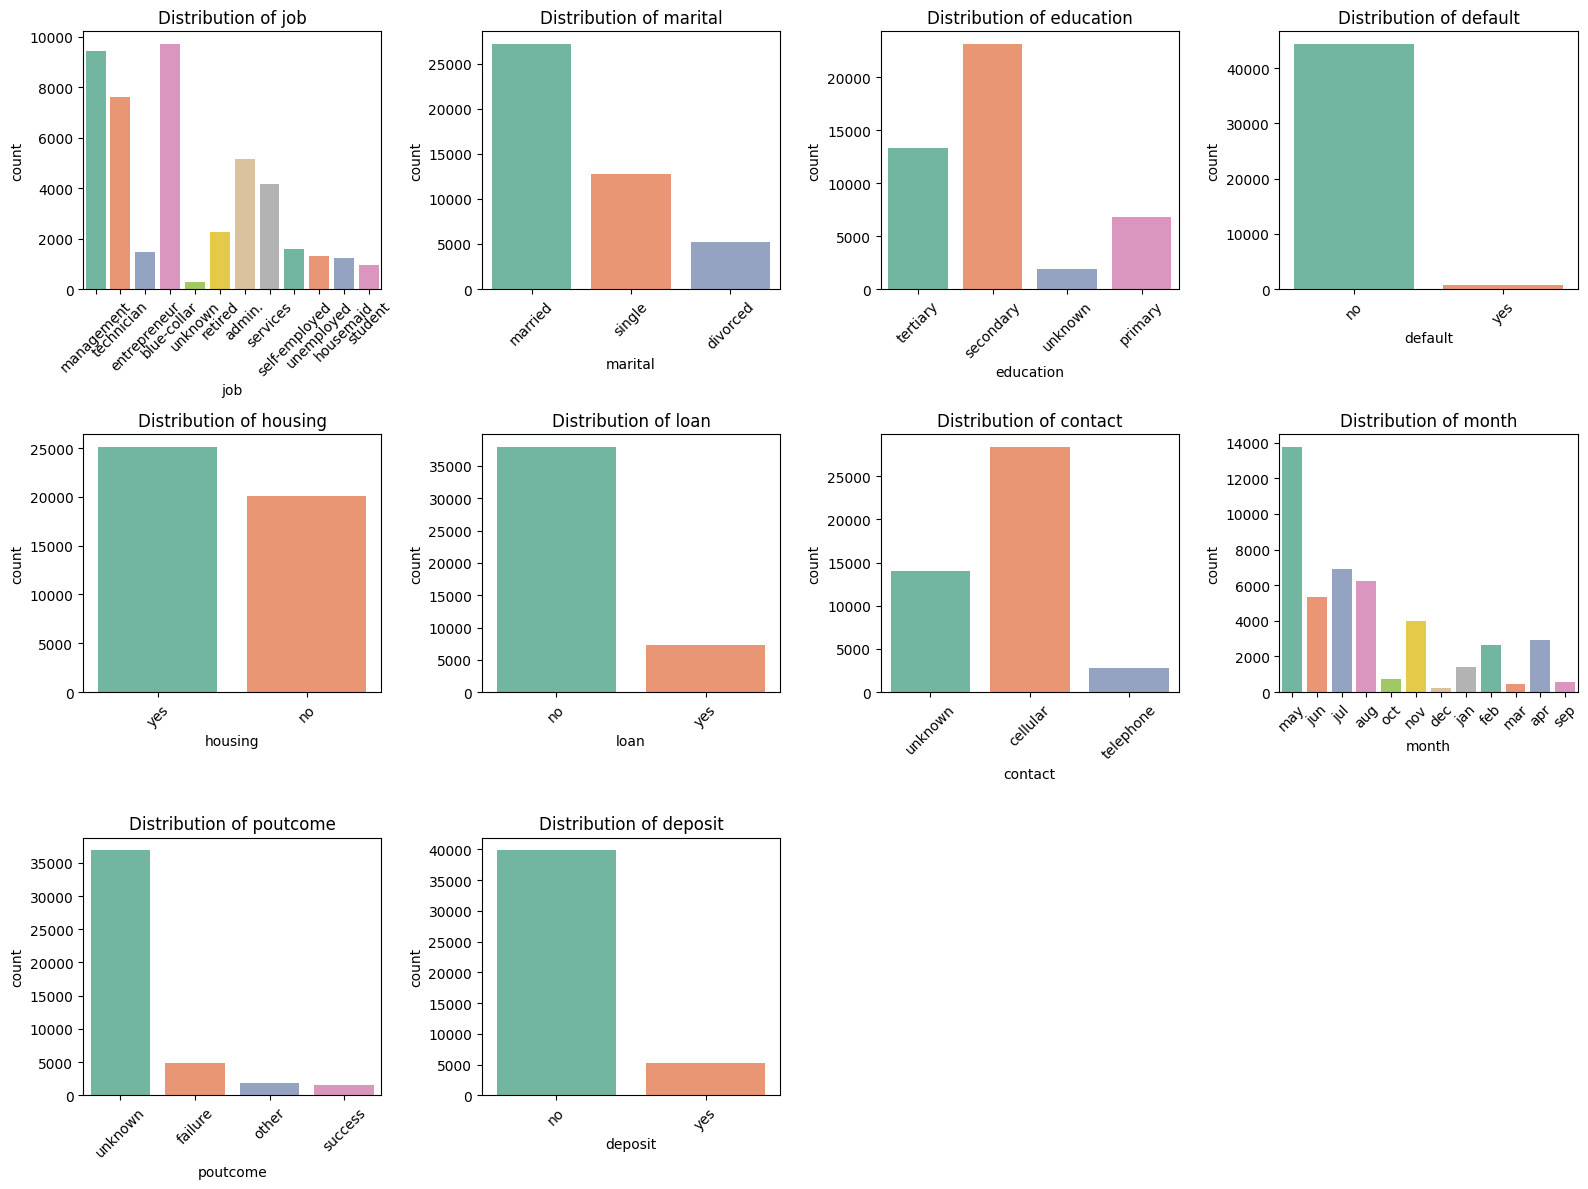

In [63]:
# Categorical feature distributions (job, marital, education, etc.)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

plt.figure(figsize=(16, 12))

# Plot for each categorical feature
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)  # Create subplots for each categorical variable
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


b. Numerical Features: Distribution of Values

For numerical features such as age, balance, duration, campaign, pdays, previous, we'll visualize their distributions:

- Purpose: To visualize the distribution of numerical features and identify skewness, outliers, or any unusual patterns.


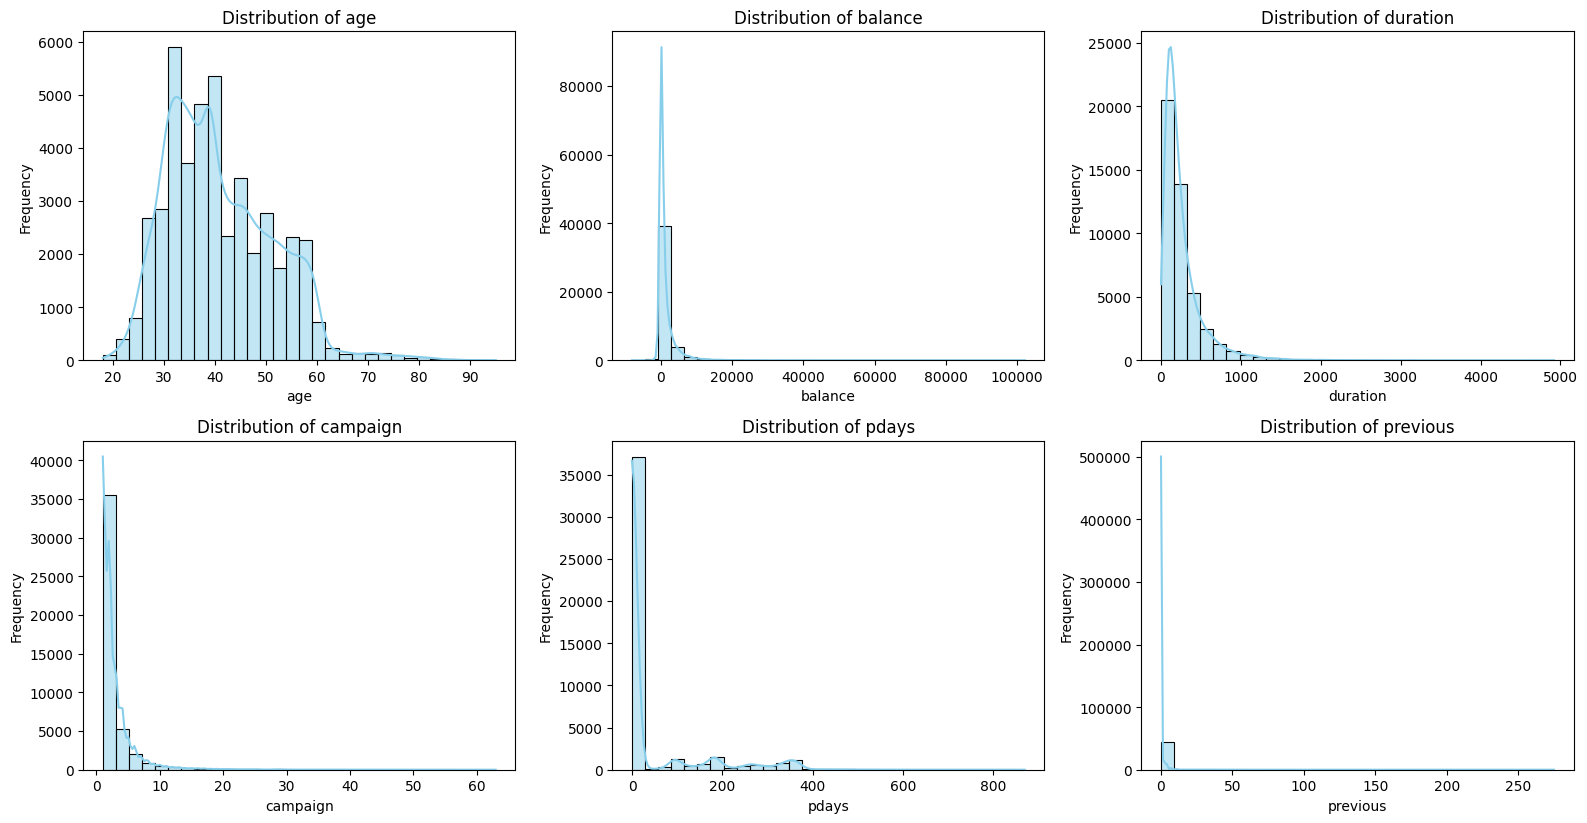

In [64]:
# Numerical feature distributions (age, balance, etc.)
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(16, 12))

# Plot for each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create subplots for each numerical variable
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**3. Bivariate Analysis (Two Variables)**


a. Relationship Between Numerical Variables
We’ll examine the relationships between pairs of numerical features (e.g., balance vs. age, duration vs. campaign) using scatter plots or correlation matrices.

- Purpose: This gives us insights into potential correlations and trends between variables. For example, whether duration is positively correlated with campaign or if balance is related to whether a client subscribes to a term deposit (deposit).


<Figure size 1000x800 with 0 Axes>

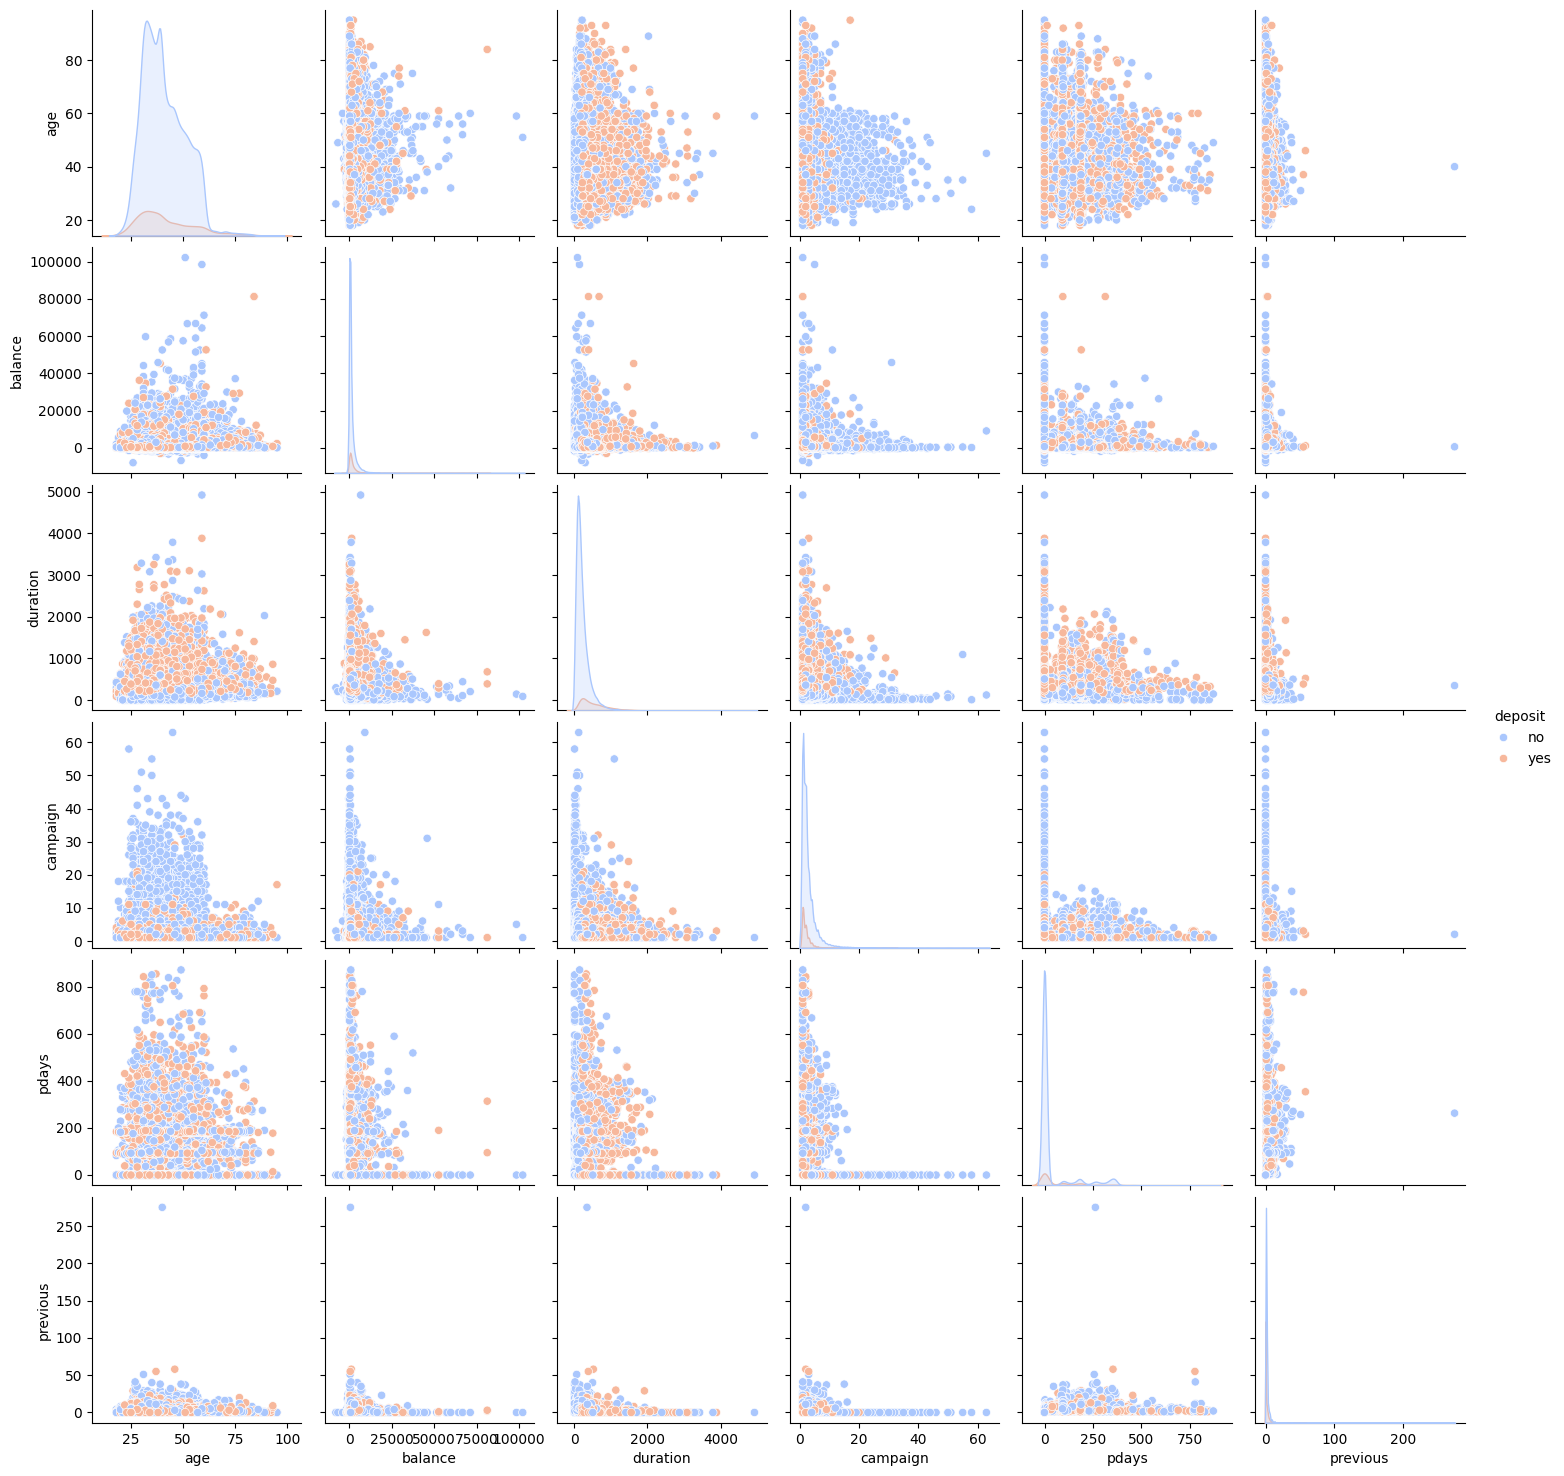

In [66]:
# Plotting numerical relationships with scatter plots and heatmaps
# Plotting numerical relationships with scatter plots and heatmaps
plt.figure(figsize=(10, 8))

# Include 'deposit' column in the DataFrame for the pairplot
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'deposit']], hue='deposit', palette='coolwarm')
plt.show()


b. Numerical vs Categorical Variables

We will look at the relationship between numerical variables and the categorical target variable deposit.

- Purpose: These box plots will help visualize how the distribution of numerical features differs across the two categories of the target variable (deposit = yes or deposit = no).

<ipython-input-67-213469f9eed5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y=col, palette='Set2')
<ipython-input-67-213469f9eed5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y=col, palette='Set2')
<ipython-input-67-213469f9eed5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='deposit', y=col, palette='Set2')
<ipython-input-67-213469f9eed5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

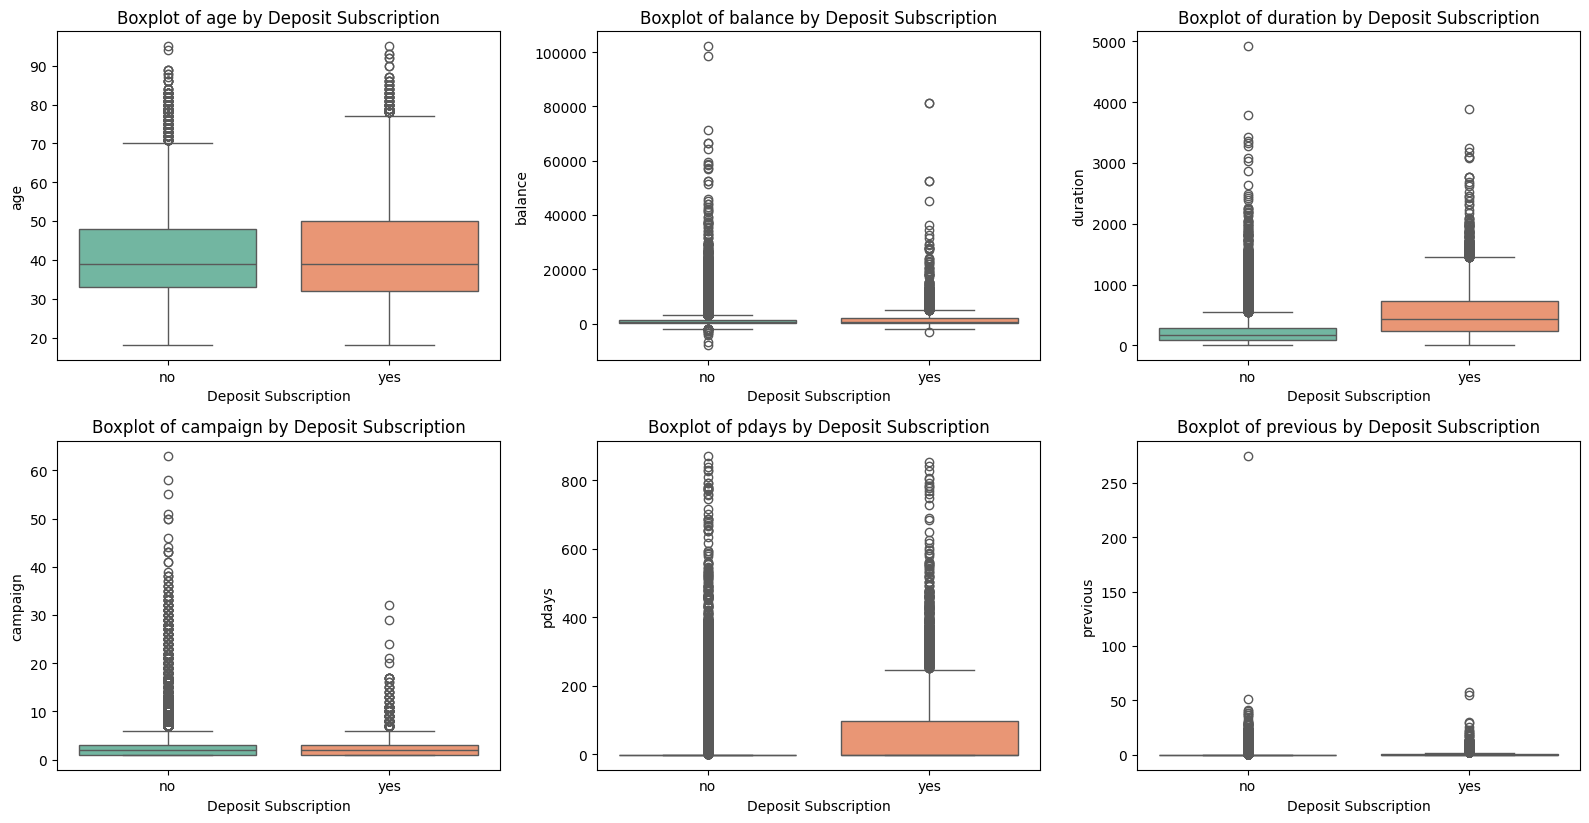

In [67]:
# Boxplots for numerical features vs deposit (categorical)
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='deposit', y=col, palette='Set2')
    plt.title(f"Boxplot of {col} by Deposit Subscription")
    plt.xlabel('Deposit Subscription')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


**4. Multivariate Analysis (Multiple Variables)**

a.  Correlation Heatmap

A correlation heatmap allows us to see the relationships between numerical variables and understand how features correlate with each other.

- Purpose: To identify strong correlations between numerical features, which can help in feature selection or addressing multicollinearity in modeling.


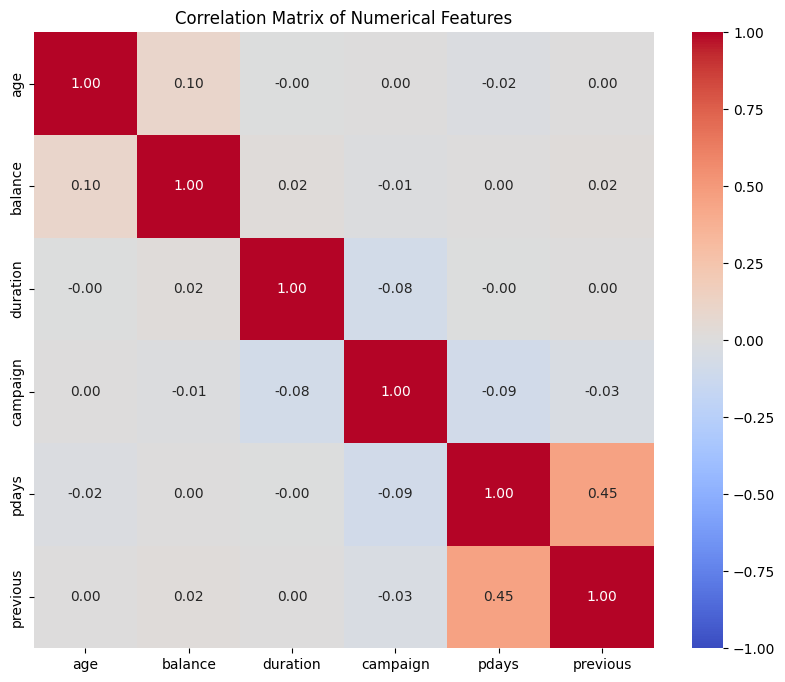

In [68]:
# Correlation matrix of numerical features
correlation_matrix = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


b. Visualizing Deposit Subscription by Multiple Features
We can use FacetGrid to show the relationship between multiple features and the deposit target variable.

- Purpose: To see how different numerical variables (like balance) affect the distribution of the target variable (deposit).

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


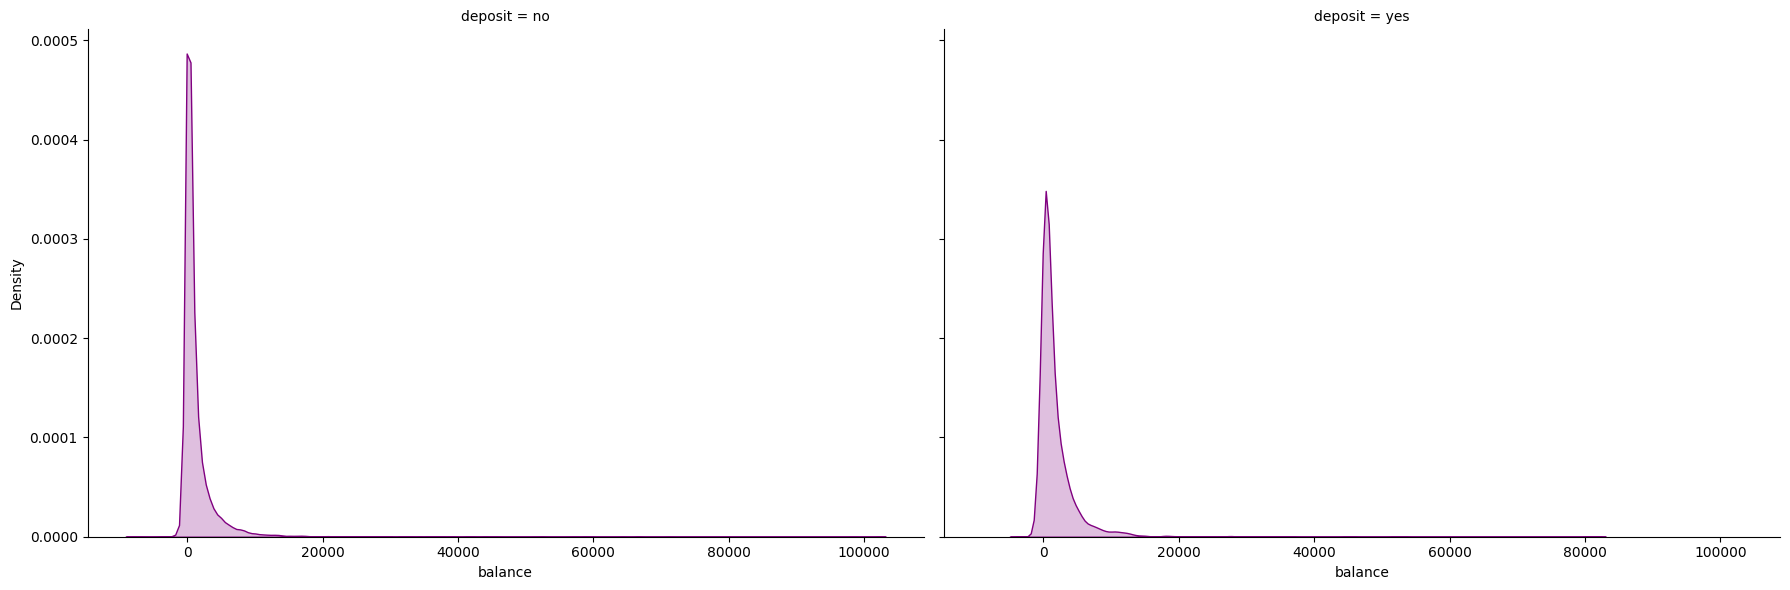

In [69]:
# Visualizing the relationship between numerical features and deposit subscription using FacetGrid
sns.FacetGrid(df, col='deposit', height=6, aspect=1.5).map(sns.kdeplot, 'balance', shade=True, color='purple')
plt.show()


**5. Insights and Feature Engineering**

From the visualizations, we can draw several conclusions and possibly derive new features:

- **Feature Importance**: Look at the boxplots and pair plots to identify which features (like duration, balance, etc.) are most associated with deposit.

- **Imbalanced Data**: If the deposit feature is highly imbalanced, consider techniques like resampling or using specific algorithms designed for imbalanced data.

- **Skewed Distributions**: Numerical features such as balance may need transformation (like log or square root transformation) to deal with skewness.

- **Potential Multicollinearity**: If numerical features are highly correlated (e.g., previous and campaign), it may be worth considering dimensionality reduction techniques like PCA or removing redundant variables.
